### Regresson Project: Regression Model to predict housing prices

Team:
- Chuk Leng Lim
- Dennis Nkansah-Tieku
- Sebastian Günther
- Alen Pavlic Ravser

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import datetime

from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.preprocessing import Normalizer
from haversine import haversine
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
## Reading an csv file into the notebook and assigning the file as 'data'
data = pd.read_csv('regression_data_clean.csv')

In [3]:
## Checking for the individual columns in the table
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
#Checking for null values
pd.isnull(data).any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

In [5]:
#numerical
data.select_dtypes(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [6]:
# other than numerical
data.select_dtypes(exclude=np.number)

,date
0,10/13/14
1,12/9/14
2,2/25/15
3,12/9/14
4,2/18/15
...,...
21592,5/21/14
21593,2/23/15
21594,6/23/14
21595,1/16/15


In [7]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0.

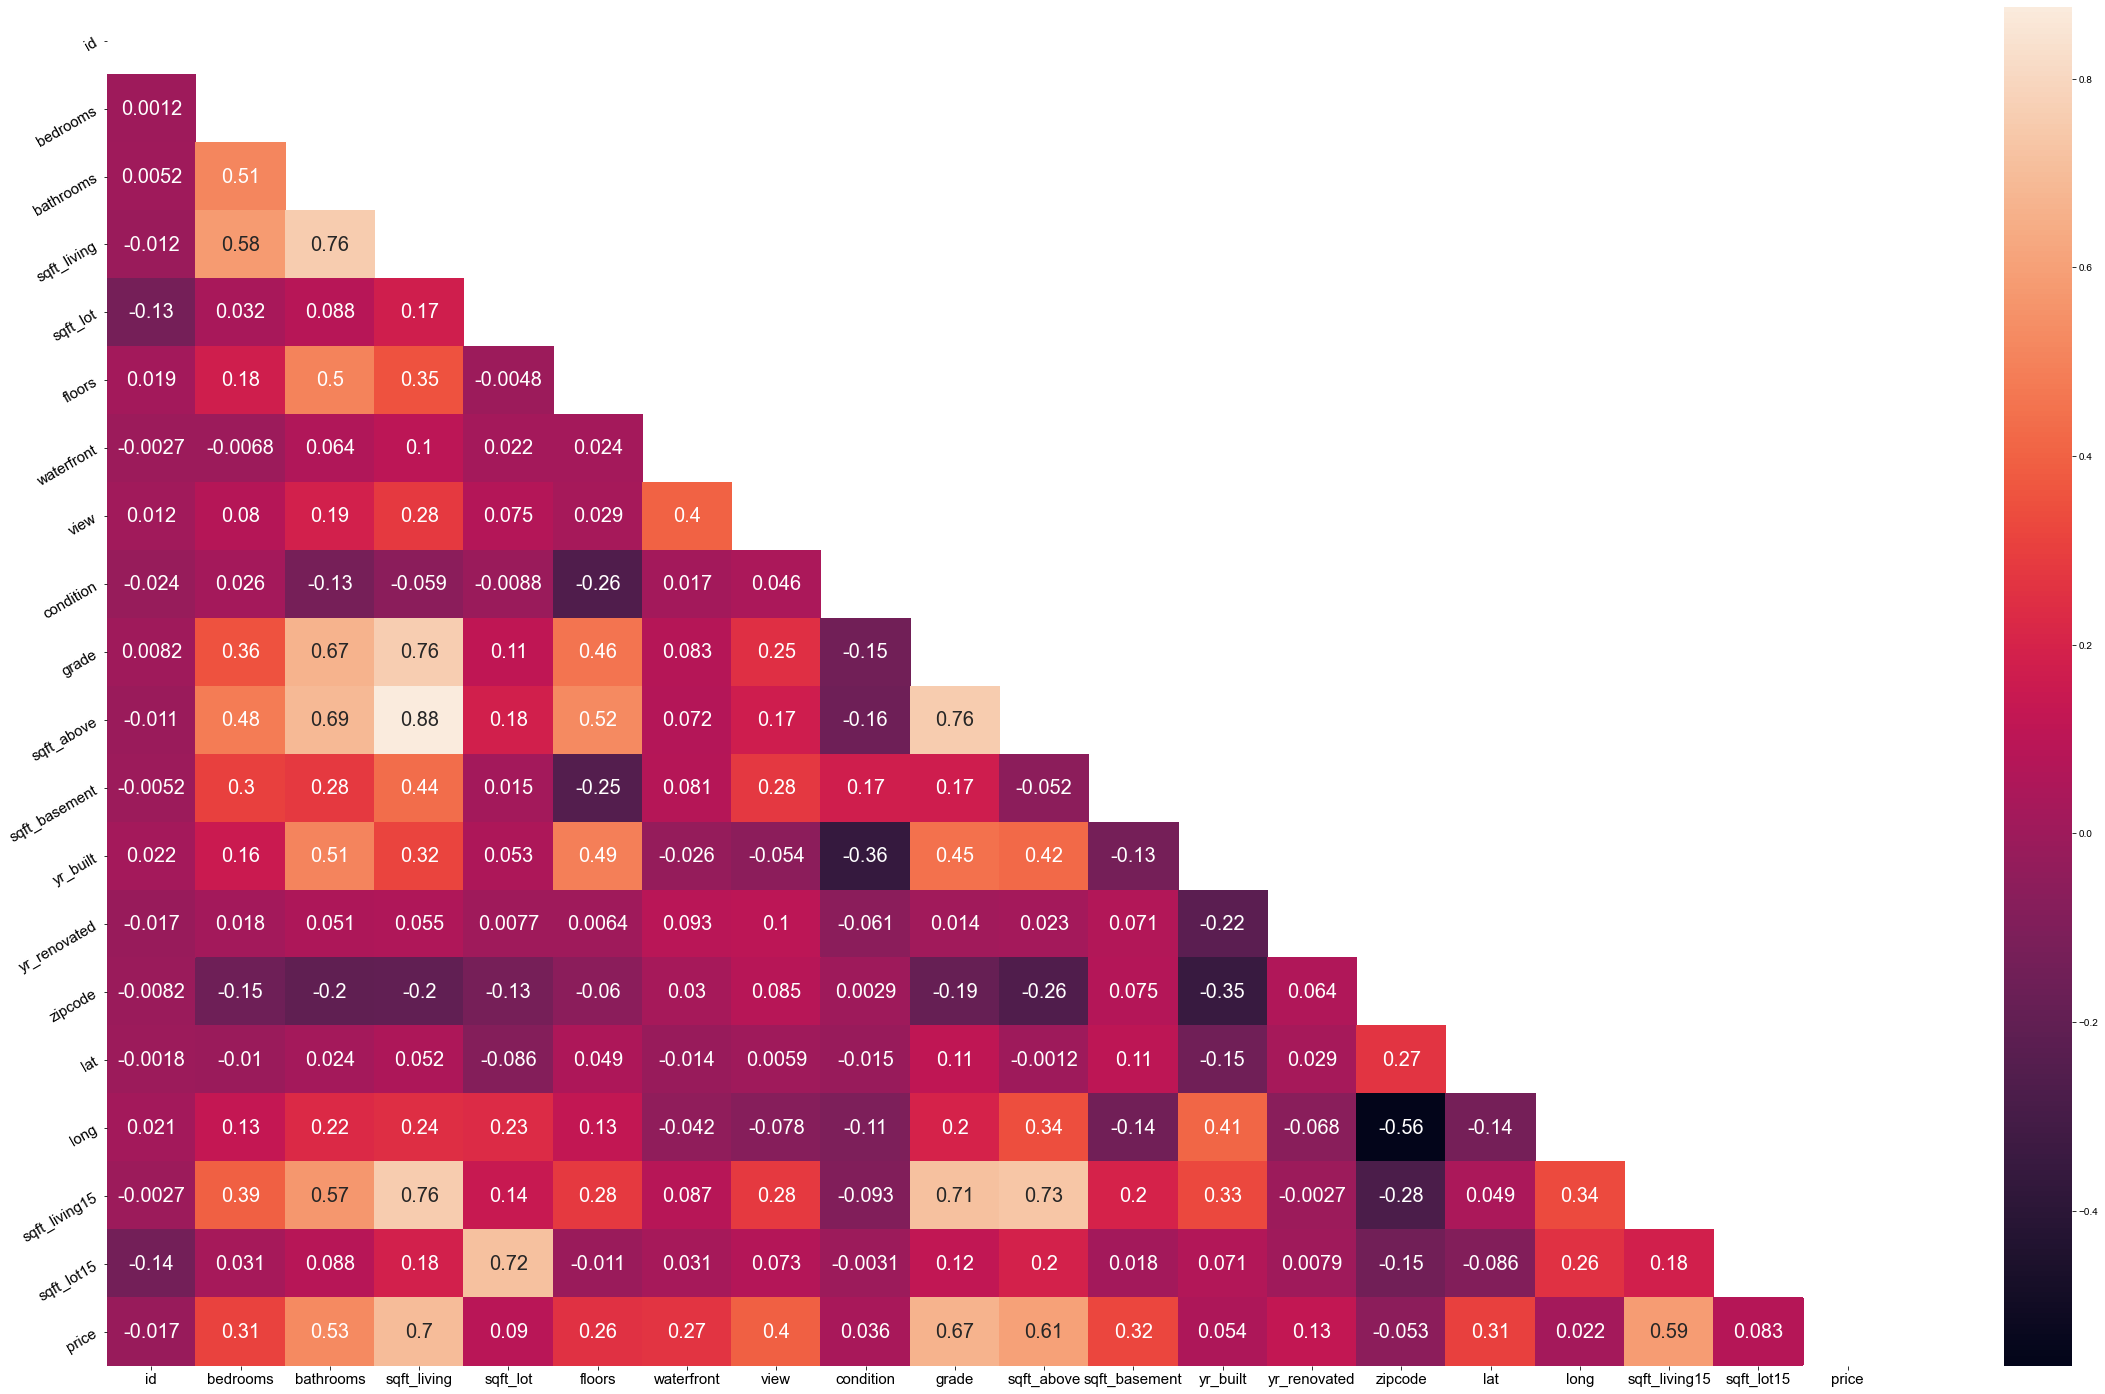

In [8]:
plt.figure(figsize=(40,25))
heatmap = sns.heatmap(data.corr(), mask=mask, annot=True, yticklabels=True , annot_kws={"size": 20})
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30) 
sns.set_style('white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
#sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'red'}})
#plt.show()

## First Model

- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- grade
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- price

In [10]:
df1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15','price']]
df1x = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']]
df1y= data[['price']]

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df1x, df1y, test_size=0.30, random_state=10)

In [12]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X1_train, y1_train)
print('Training data r-squared:', regr.score(X1_train, y1_train)) #model score
print('Linear Regression r2 score:', regr.score(X1_test, y1_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.6529219633626915
Linear Regression r2 score: 0.6565580307324819


In [13]:
r_2 = metrics.r2_score(y1_test, regr.predict(X1_test))
mae = metrics.mean_absolute_error(y1_test, regr.predict(X1_test))
mse = metrics.mean_squared_error(y1_test, regr.predict(X1_test))

In [14]:
print(f'Our list of predictors: {df1x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
The R-squared score of our test is 0.6565580307324819
The MAE score of our test is 138555.2390458784
The MSE score of our test is 44646832964.63488
The RMSE score of our test is $211297.9719841979


## Test 1 - KNN & Decision Tree

In [15]:
# KNN Model
neigh = KNeighborsRegressor(n_neighbors=5)
knn_model = neigh.fit(X1_train, y1_train)
knn_predictions = neigh.predict(X1_test)

In [16]:
# Knn
print('r-square:',round(r2_score(y1_test, knn_predictions),3)) # predict
print('adjusted r-square:', round((1-r2_score(y1_test, knn_predictions))*(len(y1_test)-1)/(len(y1_test)-df1y.shape[1]-1),3)) #1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print('mse:',mean_squared_error(y1_test, neigh.predict(X1_test)))
print('rmse:',math.sqrt(mean_squared_error(y1_test, neigh.predict(X1_test))))
print('mae:',mean_absolute_error(y1_test, neigh.predict(X1_test)))

r-square: 0.511
adjusted r-square: 0.489
mse: 63526396252.09361
rmse: 252044.43309086122
mae: 156832.09216049383


In [17]:
# Decision Tree Model
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X1_train, y1_train)
Tree_predictions = clf.predict(X1_test)

In [18]:
# Decision Tree
print('r-square:',round(r2_score(y1_test, Tree_predictions),3)) # predict
print('adjusted r-square:', round((1-r2_score(y1_test, Tree_predictions))*(len(y1_test)-1)/(len(y1_test)-df1y.shape[1]-1),3))
print('mse:',mean_squared_error(y1_test, clf.predict(X1_test)))
print('rmse:',math.sqrt(mean_squared_error(y1_test, clf.predict(X1_test))))
print('mae:',mean_absolute_error(y1_test, clf.predict(X1_test)))

r-square: 0.543
adjusted r-square: 0.457
mse: 59363128326.66345
rmse: 243645.49724274292
mae: 156474.82240226338


## Test 2 Categorical

#### 7 categorical 
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade

#### 8 numerical 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- price

In [19]:
df2 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15','price']]

In [20]:
# changing numerical to categorical object 
df2['bedrooms'] = df2['bedrooms'].astype('object')
df2['bathrooms'] = df2['bathrooms'].astype('object')
df2['floors'] = df2['floors'].astype('object')
df2['waterfront'] = df2['waterfront'].astype('object')
df2['view'] = df2['view'].astype('object')
df2['condition'] = df2['condition'].astype('object')
df2['grade'] = df2['grade'].astype('object')

In [21]:
#encoding
categorical = df2.select_dtypes(include=np.object)
categorical

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,3,1,1,0,0,3,7
1,3,2.25,2,0,0,3,7
2,2,1,1,0,0,3,6
3,4,3,1,0,0,5,7
4,3,2,1,0,0,3,8
...,...,...,...,...,...,...,...
21592,3,2.5,3,0,0,3,8
21593,4,2.5,2,0,0,3,8
21594,2,0.75,2,0,0,3,7
21595,3,2.5,2,0,0,3,8


In [22]:
numerical = df2.select_dtypes(exclude=np.object)
numerical

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1955,1340,5650,221900
1,2570,7242,2170,400,1951,1690,7639,538000
2,770,10000,770,0,1933,2720,8062,180000
3,1960,5000,1050,910,1965,1360,5000,604000
4,1680,8080,1680,0,1987,1800,7503,510000
...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,2009,1530,1509,360000
21593,2310,5813,2310,0,2014,1830,7200,400000
21594,1020,1350,1020,0,2009,1020,2007,402101
21595,1600,2388,1600,0,2004,1410,1287,400000


In [23]:
cats1 = pd.DataFrame()
cats1[['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']] =categorical[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view','condition','grade']]


In [24]:
# cats1 for ordinal encoding
enc = OrdinalEncoder()
cats1_encoding = enc.fit_transform(cats1[['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']])
cats1_encoding

array([[2., 2., 0., ..., 0., 2., 4.],
       [2., 7., 2., ..., 0., 2., 4.],
       [1., 2., 0., ..., 0., 2., 3.],
       ...,
       [1., 1., 2., ..., 0., 2., 4.],
       [2., 8., 2., ..., 0., 2., 5.],
       [1., 1., 2., ..., 0., 2., 4.]])

In [25]:
data_full = pd.concat([numerical,pd.DataFrame(cats1_encoding)], axis = 1)
data_full.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,price,0,1,2,3,4,5,6
0,1180,5650,1180,0,1955,1340,5650,221900,2.0,2.0,0.0,0.0,0.0,2.0,4.0
1,2570,7242,2170,400,1951,1690,7639,538000,2.0,7.0,2.0,0.0,0.0,2.0,4.0
2,770,10000,770,0,1933,2720,8062,180000,1.0,2.0,0.0,0.0,0.0,2.0,3.0
3,1960,5000,1050,910,1965,1360,5000,604000,3.0,10.0,0.0,0.0,0.0,4.0,4.0
4,1680,8080,1680,0,1987,1800,7503,510000,2.0,6.0,0.0,0.0,0.0,2.0,5.0


In [26]:
df2y = numerical['price']
df2x = data_full.drop(['price'], axis = 1)

In [27]:
df2x

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15,0,1,2,3,4,5,6
0,1180,5650,1180,0,1955,1340,5650,2.0,2.0,0.0,0.0,0.0,2.0,4.0
1,2570,7242,2170,400,1951,1690,7639,2.0,7.0,2.0,0.0,0.0,2.0,4.0
2,770,10000,770,0,1933,2720,8062,1.0,2.0,0.0,0.0,0.0,2.0,3.0
3,1960,5000,1050,910,1965,1360,5000,3.0,10.0,0.0,0.0,0.0,4.0,4.0
4,1680,8080,1680,0,1987,1800,7503,2.0,6.0,0.0,0.0,0.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,2009,1530,1509,2.0,8.0,4.0,0.0,0.0,2.0,5.0
21593,2310,5813,2310,0,2014,1830,7200,3.0,8.0,2.0,0.0,0.0,2.0,5.0
21594,1020,1350,1020,0,2009,1020,2007,1.0,1.0,2.0,0.0,0.0,2.0,4.0
21595,1600,2388,1600,0,2004,1410,1287,2.0,8.0,2.0,0.0,0.0,2.0,5.0


In [28]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2x, df2y, test_size=0.30, random_state=10)

In [29]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X2_train, y2_train)
print('Training data r-squared:', regr.score(X2_train, y2_train)) #model score
print('Linear Regression r2 score:', regr.score(X2_test, y2_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.6536298040506268
Linear Regression r2 score: 0.656395872442693


In [30]:
r_2 = metrics.r2_score(y1_test, regr.predict(X2_test))
mae = metrics.mean_absolute_error(y2_test, regr.predict(X2_test))
mse = metrics.mean_squared_error(y2_test, regr.predict(X2_test))

In [31]:
print(f'Our list of predictors: {df2x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index([  'sqft_living',      'sqft_lot',    'sqft_above', 'sqft_basement',
            'yr_built', 'sqft_living15',    'sqft_lot15',               0,
                     1,               2,               3,               4,
                     5,               6],
      dtype='object')
The R-squared score of our test is 0.656395872442693
The MAE score of our test is 138576.05120578027
The MSE score of our test is 44667913248.135086
The RMSE score of our test is $211347.84893188547


## Test 3 StandardScaler x features

#### 14 numerical 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade

In [32]:
df1 = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15','price']]
df1x = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']]
df1y= data[['price']]

In [33]:
df1x_scaled = StandardScaler().fit_transform(df1x)

In [34]:
df1x_scaled

array([[-0.40290302, -1.45107268, -0.98065209, ..., -0.54467809,
        -0.94367562, -0.26062671],
       [-0.40290302,  0.17448579,  0.53336915, ..., -0.68085037,
        -0.43288674, -0.18769961],
       [-1.48249316, -1.45107268, -1.4272339 , ..., -1.29362563,
         1.07029196, -0.17219022],
       ...,
       [-1.48249316, -1.77618438, -1.15492792, ...,  1.29364769,
        -1.41068259, -0.39419807],
       [-0.40290302,  0.49959749, -0.52317805, ...,  1.12343234,
        -0.84151784, -0.42059702],
       [-1.48249316, -1.77618438, -1.15492792, ...,  1.25960462,
        -1.41068259, -0.41803046]])

In [35]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df1x_scaled, df1y, test_size=0.30, random_state=10)

In [36]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X3_train, y3_train)
print('Training data r-squared:', regr.score(X3_train, y3_train)) #model score
print('Linear Regression r2 score:', regr.score(X3_test, y3_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.6529219633626915
Linear Regression r2 score: 0.6565580307324552


In [37]:
r_2 = metrics.r2_score(y3_test, regr.predict(X3_test))
mae = metrics.mean_absolute_error(y3_test, regr.predict(X3_test))
mse = metrics.mean_squared_error(y3_test, regr.predict(X3_test))

In [38]:
print(f'Our list of predictors: {df1x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
The R-squared score of our test is 0.6565580307324552
The MAE score of our test is 138555.2390458854
The MSE score of our test is 44646832964.63833
The RMSE score of our test is $211297.97198420606


## Test 4 adding date, yr_renovated

#### 14 numerical 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade

adding numerical yr_renovated

adding categorical engineered date

In [39]:
df4 = data[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15','price']]

df4x = data[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated', 'sqft_living15', 'sqft_lot15']]
df4y= data[['price']]

In [40]:
# converting datetime to year and month as object
df4x['date'] = pd.to_datetime(df4x['date']).dt.strftime('%y%m')
df4x['date'] = df4x['date'].astype('object')

In [41]:
categorical = df4x.select_dtypes(include=np.object)
categorical

,date
0,1410
1,1412
2,1502
3,1412
4,1502
...,...
21592,1405
21593,1502
21594,1406
21595,1501


In [42]:
enc = OrdinalEncoder()
cat_enc = enc.fit_transform(categorical[['date']])
cat_enc

array([[5.],
       [7.],
       [9.],
       ...,
       [1.],
       [8.],
       [5.]])

In [43]:
numerical = df4x.select_dtypes(exclude=np.object)
numerical

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [44]:
cat_full = pd.concat([pd.DataFrame(cat_enc), numerical], axis =1)
cat_full.head()

,0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,5.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,7.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,9.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,7.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,9.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


In [45]:
X4_train, X4_test, y4_train, y4_test = train_test_split(cat_full, df4y, test_size=0.30, random_state=10)

In [46]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X4_train, y4_train)
print('Training data r-squared:', regr.score(X4_train, y4_train)) #model score
print('Linear Regression r2 score:', regr.score(X4_test, y4_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.6540908957871856
Linear Regression r2 score: 0.6576716222464984


In [47]:
r_2 = metrics.r2_score(y1_test, regr.predict(X4_test))
mae = metrics.mean_absolute_error(y1_test, regr.predict(X4_test))
mse = metrics.mean_squared_error(y1_test, regr.predict(X4_test))

In [48]:
print(f'Our list of predictors: {df4x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')
The R-squared score of our test is 0.6576716222464984
The MAE score of our test is 138185.99050984488
The MSE score of our test is 44502068087.98579
The RMSE score of our test is $210955.1328789745


## Test 5 : adding zipcode, lat_long, distance_from_center

#### 15 numerical 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_renovated

#### categorical 
- engineered date

adding engineered distance_from_center

adding zipcode

adding engineered lat_long

In [49]:
df5 = data[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long', 'sqft_living15', 'sqft_lot15','price']]
df5x = df5[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long', 'sqft_living15', 'sqft_lot15']]
df5y= df5[['price']]

In [50]:
# converting datetime to year and month as object
df5x['date'] = pd.to_datetime(df5x['date']).dt.strftime('%y%m')
df5x['date'] = df5x['date'].astype('object')

In [51]:
df5x['coordinate'] = tuple(zip(df5x.lat, df5x.long))
seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [52]:
seattle_distance = []
for i in df5x['coordinate']:
    seattle_distance.append(haversine((seattle),(i), unit='mi'))
df5x['distance_from_seattle'] = pd.Series(seattle_distance)

bellevue_distance = []
for i in df5x['coordinate']:
    bellevue_distance.append(haversine(bellevue,i, unit='mi'))
df5x['distance_from_bellevue'] = pd.Series(bellevue_distance)

In [53]:
df5x['distance_from_center'] = df5x[['distance_from_bellevue', 'distance_from_seattle']].min(axis=1)

In [54]:
df5x = df5x.drop(['distance_from_bellevue', 'distance_from_seattle','coordinate'], axis = 1)

In [55]:
# adding lat_long by grouping lat and long to 4 bins
latbins = pd.cut(df5x.lat, 4, labels=[f'lat{k}' for k in range(1,4+1)], retbins=True)
longbins = pd.cut(df5x.long, 4, labels=[f'long{k}' for k in range(1,4+1)], retbins=True)

df5x['lat_long'] = [f'{latbins[0][row]}_{longbins[0][row]}' for row in df5x.index]

In [56]:
cats2 = pd.DataFrame()
cats2[['zipcode','lat_long']] =df5x[['zipcode', 'lat_long']]
cats2.head()

,zipcode,lat_long
0,98178,lat3_long1
1,98125,lat4_long1
2,98028,lat4_long1
3,98136,lat3_long1
4,98074,lat3_long2


In [57]:
cats2_ =pd.get_dummies(data=cats2,drop_first=True)
cats2_

,zipcode,lat_long_lat1_long2,lat_long_lat1_long3,lat_long_lat2_long1,lat_long_lat2_long2,lat_long_lat2_long3,lat_long_lat2_long4,lat_long_lat3_long1,lat_long_lat3_long2,lat_long_lat3_long3,lat_long_lat4_long1,lat_long_lat4_long2,lat_long_lat4_long3,lat_long_lat4_long4
0,98178,0,0,0,0,0,0,1,0,0,0,0,0,0
1,98125,0,0,0,0,0,0,0,0,0,1,0,0,0
2,98028,0,0,0,0,0,0,0,0,0,1,0,0,0
3,98136,0,0,0,0,0,0,1,0,0,0,0,0,0
4,98074,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,98103,0,0,0,0,0,0,0,0,0,1,0,0,0
21593,98146,0,0,0,0,0,0,1,0,0,0,0,0,0
21594,98144,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,98027,0,0,0,0,0,0,0,1,0,0,0,0,0


In [58]:
df5x = df5x.drop(['long', 'lat'], axis = 1)
df5x

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,distance_from_center,lat_long
0,1410,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,7.622786,lat3_long1
1,1412,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,7.766476,lat4_long1
2,1502,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,8.561145,lat4_long1
3,1412,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,6.655340,lat3_long1
4,1502,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,7.402273,lat3_long2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1405,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6.241665,lat4_long1
21593,1502,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,6.910386,lat3_long1
21594,1406,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2.016289,lat3_long1
21595,1501,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,8.420838,lat3_long2


In [59]:
num5 = df5x.select_dtypes(include=np.number)
num5

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,distance_from_center
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,7.622786
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,7.766476
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,8.561145
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,6.655340
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,7.402273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,6.241665
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,6.910386
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2.016289
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,8.420838


In [60]:
df5x_full = pd.concat([num5,cats2_ ], axis = 1)
df5x_full.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat_long_lat2_long2,lat_long_lat2_long3,lat_long_lat2_long4,lat_long_lat3_long1,lat_long_lat3_long2,lat_long_lat3_long3,lat_long_lat4_long1,lat_long_lat4_long2,lat_long_lat4_long3,lat_long_lat4_long4
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,1,0,0,0,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,1,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,1,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,1,0,0,0,0,0


In [61]:
X5_train, X5_test, y5_train, y5_test = train_test_split(df5x_full, df5y, test_size=0.30, random_state=10)

In [62]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X5_train, y5_train)
print('Training data r-squared:', regr.score(X5_train, y5_train)) #model score
print('Linear Regression r2 score:', regr.score(X5_test, y5_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.7565670877324288
Linear Regression r2 score: 0.7504618392060499


In [63]:
r_2 = metrics.r2_score(y5_test, regr.predict(X5_test))
mae = metrics.mean_absolute_error(y5_test, regr.predict(X5_test))
mse = metrics.mean_squared_error(y5_test, regr.predict(X5_test))

In [64]:
print(f'Our list of predictors: {df5x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'distance_from_center', 'lat_long'],
      dtype='object')
The R-squared score of our test is 0.7504618392060499
The MAE score of our test is 114022.55803680379
The MSE score of our test is 32439508214.534878
The RMSE score of our test is $180109.71160527374


## Test 6 dropping lat, long

#### 16 numerical 
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement
- yr_built
- sqft_living15
- sqft_lot15
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_renovated
- distance_from_center

#### categorical 
- engineered date
- zipcode
- engineered lat_long (dropping column)

In [65]:
df6 = data[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long', 'sqft_living15', 'sqft_lot15','price']]
df6x = df6[['date','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long', 'sqft_living15', 'sqft_lot15']]
df6y= df6[['price']]

In [66]:
# converting datetime to year and month as object
df6x['date'] = pd.to_datetime(df6x['date']).dt.strftime('%y%m')
df6x['date'] = df6x['date'].astype('object')

In [67]:
df6x['coordinate'] = tuple(zip(df6x.lat, df6x.long))
seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [68]:
seattle_distance = []
for i in df6x['coordinate']:
    seattle_distance.append(haversine((seattle),(i), unit='mi'))
df6x['distance_from_seattle'] = pd.Series(seattle_distance)

bellevue_distance = []
for i in df6x['coordinate']:
    bellevue_distance.append(haversine(bellevue,i, unit='mi'))
df6x['distance_from_bellevue'] = pd.Series(bellevue_distance)

In [69]:
df6x['distance_from_center'] = df6x[['distance_from_bellevue', 'distance_from_seattle']].min(axis=1)

In [70]:
df6x = df6x.drop(['distance_from_bellevue', 'distance_from_seattle','long','lat','coordinate'], axis = 1)

In [71]:
cat6 = df6x.select_dtypes(include=np.object)
cat6['date']

0        1410
1        1412
2        1502
3        1412
4        1502
         ... 
21592    1405
21593    1502
21594    1406
21595    1501
21596    1410
Name: date, Length: 21597, dtype: object

In [72]:
enc = OrdinalEncoder()
cat6_enc = enc.fit_transform(cat6[['date']])
cat6_enc

array([[5.],
       [7.],
       [9.],
       ...,
       [1.],
       [8.],
       [5.]])

In [73]:
df6x['zipcode'] = df6x['zipcode'].astype('object')
cats6=pd.get_dummies(data=df6x['zipcode'],drop_first=True)
cats6

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
cat6_full = pd.concat([cats6, pd.DataFrame(cat6_enc)], axis =1)
cat6_full

,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8.0


In [75]:
num = df6x.select_dtypes(include=np.number)
num

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,distance_from_center
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,7.622786
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,7.766476
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,8.561145
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,6.655340
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,7.402273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,6.241665
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,6.910386
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,2.016289
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,8.420838


In [76]:
df6x_full = pd.concat([num,cat6_full], axis = 1)
df6x_full

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,0
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,0,0,0,0,1,0,0,0,5.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,0,0,0,0,0,0,0,0,0,7.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,0,0,0,0,0,0,0,0,9.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,0,0,0,0,0,0,0,0,7.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,0,0,0,0,0,0,0,0,0,0.0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,0,0,0,0,0,0,0,0,0,9.0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,0,0,0,0,0,0,0,0,0,1.0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,0,0,0,0,0,0,0,0,0,8.0


In [77]:
X6_train, X6_test, y6_train, y6_test = train_test_split(df6x_full, df6y, test_size=0.30, random_state=10)

In [78]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X6_train, y6_train)
print('Training data r-squared:', regr.score(X6_train, y6_train)) #model score
print('Linear Regression r2 score:', regr.score(X6_test, y6_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.813176337434171
Linear Regression r2 score: 0.8029400890879252


In [79]:
r_2 = metrics.r2_score(y6_test, regr.predict(X6_test))
mae = metrics.mean_absolute_error(y6_test, regr.predict(X6_test))
mse = metrics.mean_squared_error(y6_test, regr.predict(X6_test))

In [80]:
print(f'Our list of predictors: {df6x.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'distance_from_center'],
      dtype='object')
The R-squared score of our test is 0.8029400890879252
The MAE score of our test is 95558.46952036307
The MSE score of our test is 25617430930.999886
The RMSE score of our test is $160054.46239014983


## Test 7 transform 4 columns to log

#### 16 numerical 
- sqft_living -> log_sqft_living
- sqft_lot
- sqft_above -> Log_sqft_above
- sqft_basement
- yr_built
- sqft_living15 -> log_sqft_living15
- sqft_lot15
- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- yr_renovated
- distance_from_center

#### categorical 
- engineered date
- zipcode

#### Y
- sqft_price -> log_sqft_price

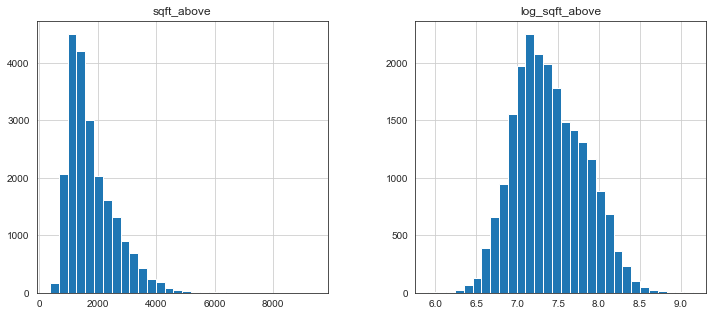

In [81]:
df6x['log_sqft_above'] = np.log(df6x['sqft_above'])
df6x[['sqft_above', 'log_sqft_above']].hist(figsize=(12,5),bins=30);

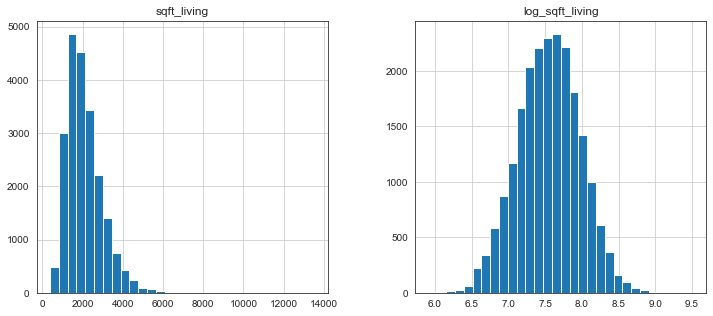

In [82]:
df6x['log_sqft_living'] = np.log(df6x['sqft_living'])
df6x[['sqft_living', 'log_sqft_living']].hist(figsize=(12,5),bins=30);

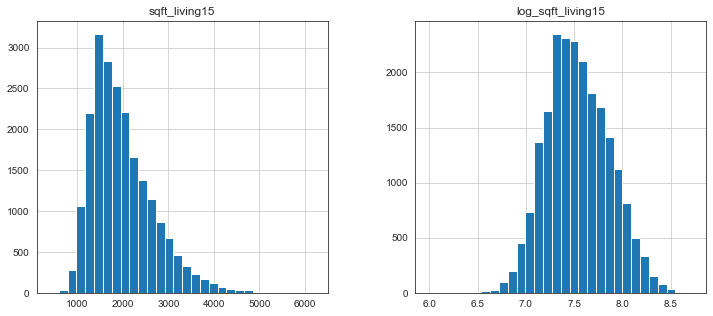

In [83]:
df6x['log_sqft_living15'] = np.log(df6x['sqft_living15'])
df6x[['sqft_living15', 'log_sqft_living15']].hist(figsize=(12,5),bins=30);

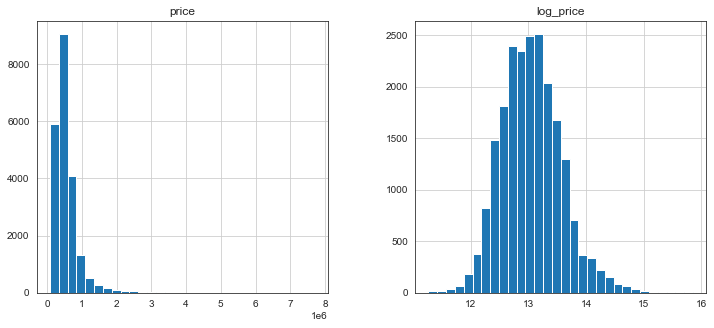

In [84]:
df6y['log_price'] = np.log(df6y['price'])
df6y[['price', 'log_price']].hist(figsize=(12,5),bins=30);

In [85]:
df7x_full = df6x_full.drop(['sqft_living15','sqft_living','sqft_above'], axis = 1)

In [86]:
num7 = pd.DataFrame()
num7[['log_sqft_living15','log_sqft_living','log_sqft_above']]= df6x[['log_sqft_living15', 'log_sqft_living','log_sqft_above']]
num7

,log_sqft_living15,log_sqft_living,log_sqft_above
0,7.200425,7.073270,7.073270
1,7.432484,7.851661,7.682482
2,7.908387,6.646391,6.646391
3,7.215240,7.580700,6.956545
4,7.495542,7.426549,7.426549
...,...,...,...
21592,7.333023,7.333023,7.333023
21593,7.512071,7.745003,7.745003
21594,6.927558,6.927558,6.927558
21595,7.251345,7.377759,7.377759


In [87]:
df7x_full = pd.concat([num7,df7x_full], axis = 1)
df7x_full

,log_sqft_living15,log_sqft_living,log_sqft_above,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,0
0,7.200425,7.073270,7.073270,3,1.00,5650,1.0,0,0,3,...,0,0,0,0,0,1,0,0,0,5.0
1,7.432484,7.851661,7.682482,3,2.25,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,7.0
2,7.908387,6.646391,6.646391,2,1.00,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,9.0
3,7.215240,7.580700,6.956545,4,3.00,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,7.0
4,7.495542,7.426549,7.426549,3,2.00,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,7.333023,7.333023,7.333023,3,2.50,1131,3.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0.0
21593,7.512071,7.745003,7.745003,4,2.50,5813,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,9.0
21594,6.927558,6.927558,6.927558,2,0.75,1350,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,1.0
21595,7.251345,7.377759,7.377759,3,2.50,2388,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,8.0


In [88]:
df7y = df6y['log_price']

In [89]:
X7_train, X7_test, y7_train, y7_test = train_test_split(df7x_full, df7y, test_size=0.30, random_state=10)

In [90]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X7_train, y7_train)
print('Training data r-squared:', regr.score(X7_train, y7_train)) #model score
print('Linear Regression r2 score:', regr.score(X7_test, y7_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.8876229676669282
Linear Regression r2 score: 0.8842831280158922


In [91]:
r_2 = metrics.r2_score(y7_test, regr.predict(X7_test))
mae = metrics.mean_absolute_error(np.exp(y7_test), np.exp(regr.predict(X7_test)))
mse = metrics.mean_squared_error(np.exp(y7_test), np.exp(regr.predict(X7_test)))

In [92]:
print(f'Our list of predictors: {df7x_full.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index([   'log_sqft_living15',      'log_sqft_living',       'log_sqft_above',
                   'bedrooms',            'bathrooms',             'sqft_lot',
                     'floors',           'waterfront',                 'view',
                  'condition',                'grade',        'sqft_basement',
                   'yr_built',         'yr_renovated',           'sqft_lot15',
       'distance_from_center',                  98002,                  98003,
                        98004,                  98005,                  98006,
                        98007,                  98008,                  98010,
                        98011,                  98014,                  98019,
                        98022,                  98023,                  98024,
                        98027,                  98028,                  98029,
                        98030,                  98031,                  98032,
                        9803

In [93]:
X_incl_const = sm.add_constant(X7_train)
model = sm.OLS(y7_train, X_incl_const.astype(float))
results = model.fit()

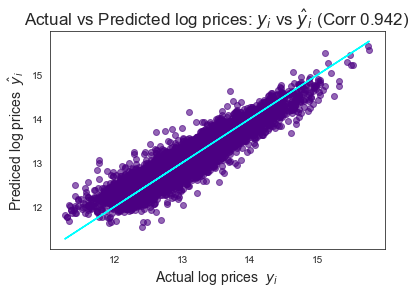

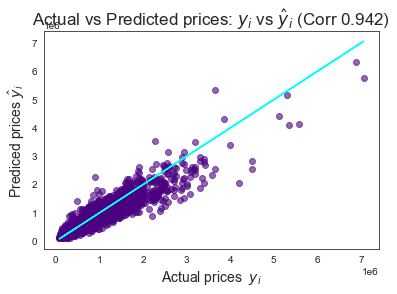

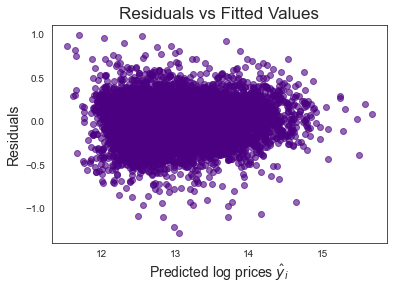

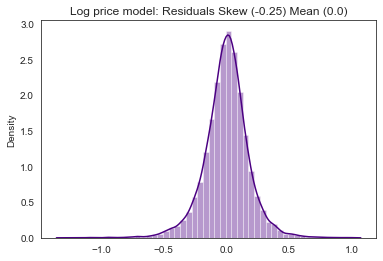

In [94]:
# Graph of Actual vs. Predicted log Prices
corr = round(y7_train.corr(results.fittedvalues), 3)
plt.scatter(x=y7_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y7_train, y7_train, color='cyan')
plt.xlabel('Actual log prices  $y _i$', fontsize=14)
plt.ylabel('Prediced log prices  $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

# Graph of Actual vs. Predicted Prices
plt.scatter(x=np.e**y7_train, y=np.e**results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(np.e**y7_train, np.e**y7_train, color='cyan')
plt.xlabel('Actual prices  $y _i$', fontsize=14)
plt.ylabel('Prediced prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
sns.distplot(results.resid, color='indigo')
plt.title(f'Log price model: Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()
